In [1]:
import pandas as pd
from gensim import utils
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords
import random
import warnings
warnings.filterwarnings("ignore")


In [2]:
sample_news_data = '../data/sample_news_data.txt'

In [3]:
with open(sample_news_data, encoding="utf8", errors='ignore') as f:
    news_lines = [line for line in f.readlines()]

In [4]:
lines_df = pd.DataFrame()

In [5]:
indices  = list(range(len(news_lines)))

In [6]:
lines_df['news'] = news_lines
lines_df['index'] = indices

In [7]:
lines_df.head()

,news,index
0,Top of the Pops leaves BBC One The BBC flagshi...,0
1,Oscars race enters final furlong The race for ...,1
2,US TV special for tsunami relief A US televisi...,2
3,Williamson lauds bowlers for adapting to atypi...,3
4,Housewives lift Channel ratings The debut of U...,4


In [11]:
class DocumentDataset(object):
    
    def __init__(self, data:pd.DataFrame, column):
        document = data[column].apply(self.preprocess)
        
        self.documents = [ TaggedDocument( text, [index]) 
                          for index, text in document.iteritems() ]
      
    def preprocess(self, document):
        return preprocess_string(remove_stopwords(document))
        
    def __iter__(self):
        for document in self.documents:
            yield documents
            
    def tagged_documents(self, shuffle=False):
        if shuffle:
            random.shuffle(self.documents)
        return self.documents


In [12]:
documents_dataset = DocumentDataset(lines_df, 'news')

In [13]:
docVecModel = Doc2Vec(min_count=1, window=5, vector_size=100, sample=1e-4, negative=5, workers=8)
docVecModel.build_vocab(documents_dataset.tagged_documents())

In [14]:
docVecModel.train(documents_dataset.tagged_documents(shuffle=True),
            total_examples = docVecModel.corpus_count,
           epochs=10)


In [15]:
docVecModel.save('../data/docVecModel.d2v')

In [16]:
docVecModel[657]

array([ 0.13805848,  0.02054609,  0.00620157, -0.23535208,  0.0385992 ,
       -0.05864267, -0.08052436,  0.05700855,  0.15521137,  0.00316227,
        0.03995956, -0.04921804,  0.21074389, -0.03008245,  0.04858598,
        0.08631032,  0.00885195, -0.2491873 , -0.08436063,  0.08865232,
       -0.02097839,  0.11763334,  0.02459638,  0.09546448,  0.1254558 ,
       -0.00875491,  0.1183552 ,  0.04289681, -0.1888077 ,  0.2858808 ,
       -0.10873522, -0.11912633, -0.04620624, -0.05692951, -0.05922568,
       -0.10007121, -0.23446682, -0.01172142,  0.19553211, -0.13520506,
        0.03978759, -0.12167215, -0.09803631,  0.07693443,  0.07802647,
        0.14447123,  0.13701321, -0.00337017, -0.24202083,  0.04348565,
        0.28693718, -0.2654759 , -0.10201034, -0.06126965, -0.04116185,
        0.01619914, -0.29627806,  0.0473277 , -0.03481805, -0.1011382 ,
        0.01250187,  0.12302344, -0.08900694,  0.06876019,  0.04318458,
        0.1254471 ,  0.09432905,  0.20466867,  0.08546089, -0.22

In [18]:
import matplotlib.pyplot as plt
 
def show_image(vector, line):
    fig, ax = plt.subplots(1,1, figsize=(10, 2))
    ax.tick_params(axis='both', 
                   which='both',
                   left=False, 
                   bottom=False,
                   top=False,
                   labelleft=False,
                   labelbottom=False)
    ax.grid(False)
    print(line)
    ax.bar(range(len(vector)), vector, 0.5)
   
  
def show_news_line(line_number):
    line = lines_df[lines_df.index==line_number].news
    doc_vector = docVecModel[line_number]
    show_image(doc_vector, line)


872    US budget deficit to reach The US budget defic...
Name: news, dtype: object


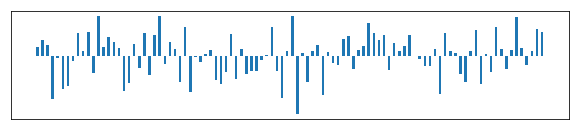

In [19]:
show_news_line(872)